In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']#List of columns for Diabetes dataset

In [9]:
data = pd.read_csv('Diabetes_Dataset.csv', names = names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


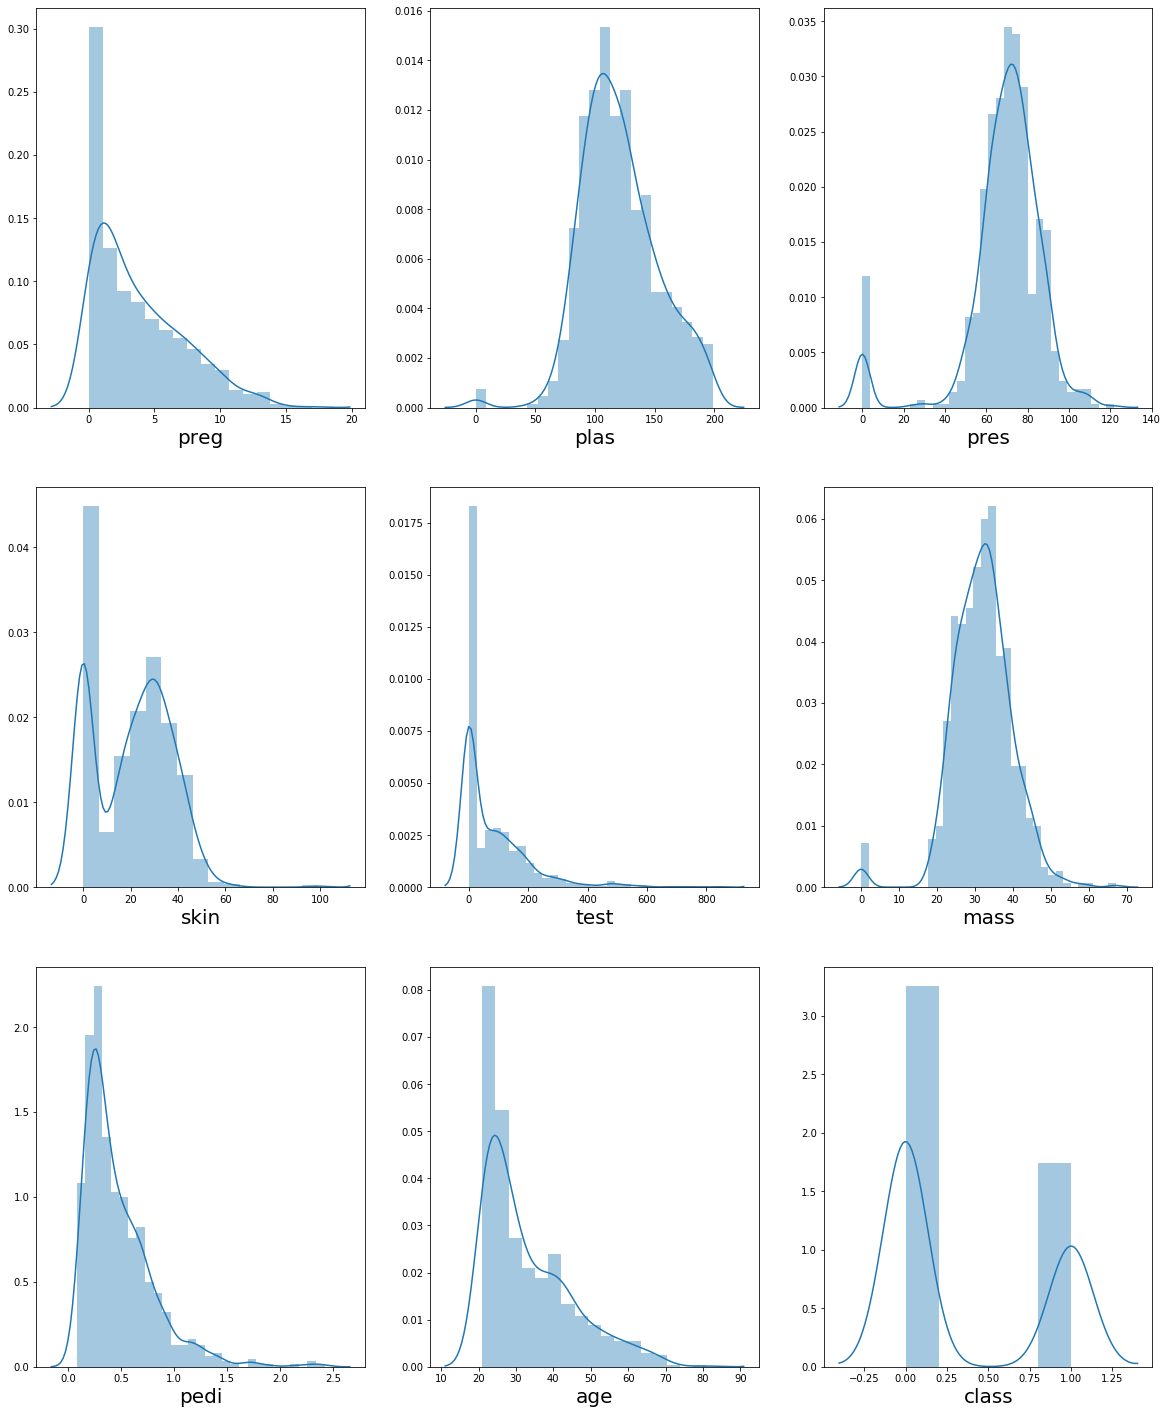

In [14]:
#Observe that we dont have null values in the data set
# Lets see how the data is distributed for each column
plt.figure(figsize=(20,25), facecolor='white')
plot_num = 1
for column in data:
    if plot_num <10:
        ax = plt.subplot(3,3,plot_num)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plot_num +=1
plt.show()        

Random Forrest is least effected by the Outliers,Hence lets go ahead with train test split

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 66)

In [19]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)

In [22]:
print("Train data Accuracy : {}".format(classifier.score(X_train,y_train)))
print("Test data Accuracy : {}".format(classifier.score(X_test,y_test)))

Train data Accuracy : 1.0
Test data Accuracy : 0.7677165354330708


In [23]:
accuracy_score(y_test,y_pred)

0.7677165354330708

In [28]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test,y_pred))

Confusion Matrix:

[[150  26]
 [ 33  45]]

 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       176
           1       0.63      0.58      0.60        78

    accuracy                           0.77       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.76      0.77      0.76       254



In [34]:
# Lets see Cross validation for K =10
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier,X,y,cv = 10, scoring='accuracy')
print(cv_score)
print(cv_score.mean())

[0.71428571 0.79220779 0.71428571 0.7012987  0.74025974 0.77922078
 0.83116883 0.83116883 0.72368421 0.78947368]
0.7617053998632948


In [35]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier,X,y,cv = 10, scoring='roc_auc')
print(cv_score)

[0.78222222 0.81185185 0.83185185 0.71592593 0.80333333 0.85444444
 0.86407407 0.90814815 0.80576923 0.83653846]


In [36]:
print(cv_score.mean())

0.8214159544159545


In Order to Increase the Accuracy of our model lets do

#### Hyper Parameter Tuning

We will Use RandomizedSearchCV from sklearn to optimise our hyperparameters.
We will focus on 3 parameters only n_estimators, max_features, and max_depth.

In [37]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#lets create the dictionary for above 3 parameters
random_params = {
    'n_estimators':range(200,2000,10),
    'max_features':['sqrt','auto'],
    'max_depth':[int(x) for x in np.linspace(100, 500, num = 11)]
}

In [38]:
rfc_random = RandomizedSearchCV(estimator=classifier,param_distributions=random_params,n_iter=100,cv=3,
                               random_state=66,verbose=2,n_jobs=-1)

In [39]:
rfc_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [40]:
rfc_random.best_params_

{'n_estimators': 390, 'max_features': 'sqrt', 'max_depth': 380}

My results were: ‘n_estimators’ = 390; ‘max_features’ = ‘sqrt’; ‘max_depth’: 380. Now we can plug these back into the model to see if it improved our performance.

In [41]:
classifier = RandomForestClassifier(n_estimators=390,max_features='sqrt',max_depth=380)

In [42]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=380, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=390,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred1 = classifier.predict(X_test)

In [44]:
print("Train data Accuracy : {}".format(classifier.score(X_train,y_train)))
print("Test data Accuracy : {}".format(classifier.score(X_test,y_test)))

Train data Accuracy : 1.0
Test data Accuracy : 0.7637795275590551


In [45]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred1))
print("\n Classification Report:\n")
print(classification_report(y_test,y_pred1))

Confusion Matrix:

[[148  28]
 [ 32  46]]

 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       176
           1       0.62      0.59      0.61        78

    accuracy                           0.76       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.76      0.76      0.76       254



In [46]:
cv_score = cross_val_score(classifier,X,y,cv = 10, scoring='roc_auc')
print(cv_score)

[0.78148148 0.83777778 0.82555556 0.73481481 0.81518519 0.85851852
 0.86148148 0.90888889 0.80846154 0.84884615]


In [47]:
print(cv_score.mean())

0.8281011396011397


as you see mean cv_score improved from previous value hence our accuracy is increased after Hyper parameter tuning